In [1]:
import cv2
import numpy as np
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plantcv.learn import train_kmeans

In [2]:
# Set input variables
args = WorkflowInputs(images=[r"R:\01-Organize\01-Management\01-Data Center\Brisk\06-AI & Machine Learning (D0340)\04-IOT_Smartfarm\picture_original_sideview_smartfarm\picture_sideview_01092025_101036.jpg"],
                      names="image",
                      result="plantcv_results.csv",
                      debug="plot")

# Set variables
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 0.5
pcv.params.text_thickness = 2

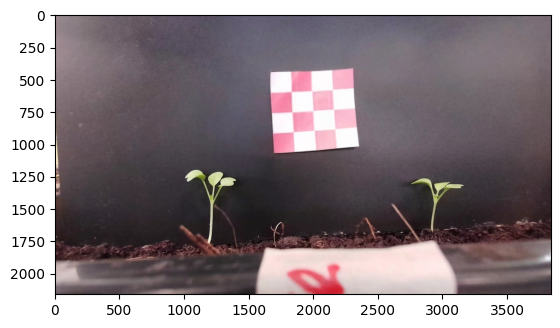

In [3]:
img, imgpath, imgname = pcv.readimage(filename=args.image)

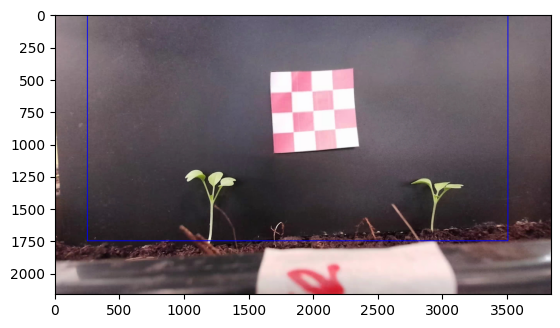

In [4]:
crop_img = pcv.crop(img=img, x=250, y=0, h=1750, w=3250)

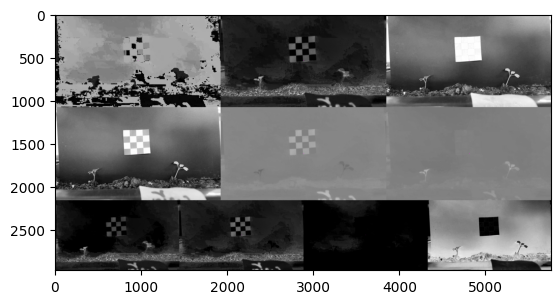

In [12]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

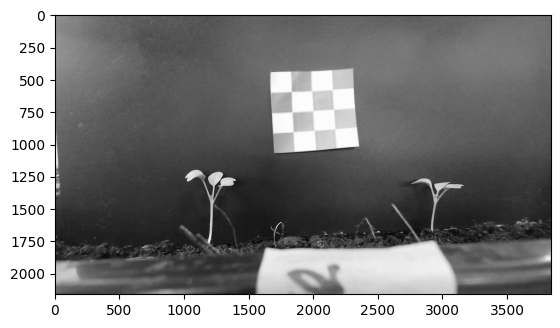

In [5]:
gray = pcv.rgb2gray(rgb_img=img)

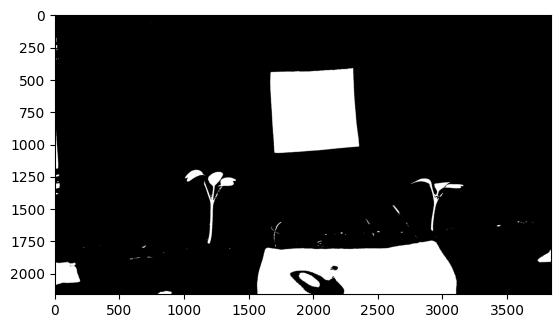

In [6]:
th = pcv.threshold.otsu(gray_img=gray, object_type='light')  

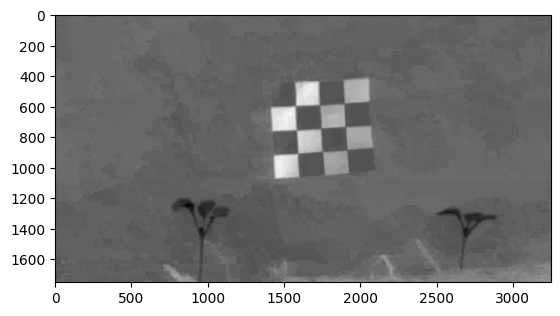

In [39]:
a = pcv.rgb2gray_lab(rgb_img=crop_img, channel='a')

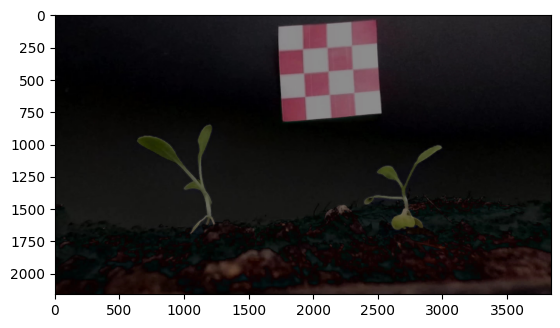

In [6]:
boundary_image = pcv.analyze.bound_horizontal(img=img, labeled_mask=b, line_position=1500, n_labels=1)

In [41]:
hist_a = pcv.visualize.histogram(img=a, bins=25)

alt.Chart(...)

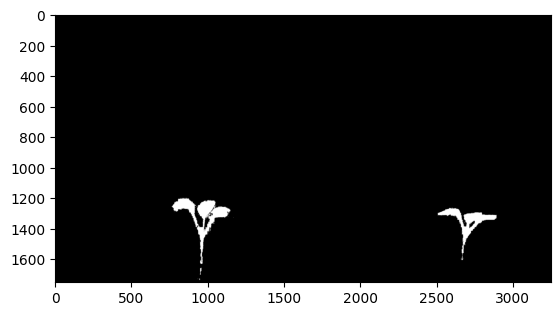

In [40]:
thresh = pcv.threshold.binary(gray_img=a, threshold=124, object_type='dark')

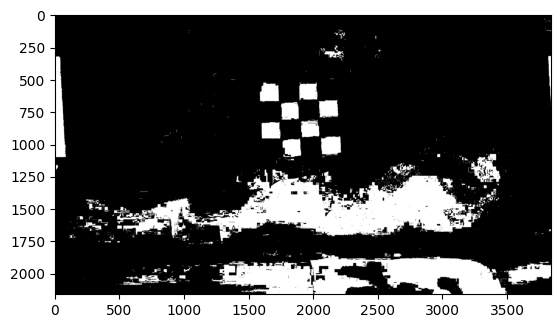

In [20]:
threshold_mean = pcv.threshold.mean(gray_img=a, ksize=2001, offset=5,
                                    object_type='dark')

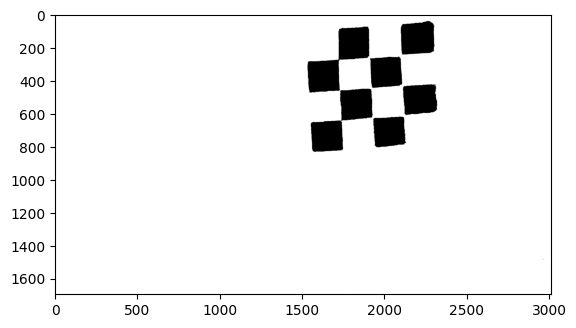

In [22]:
threshold_mean = pcv.threshold.otsu(gray_img=a, 
                                    object_type='dark')

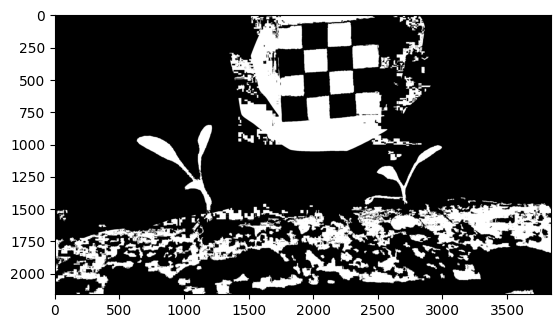

In [9]:
a_fill = pcv.fill(bin_img=threshold_mean, size=200)

There were 5140 objects not annotated.


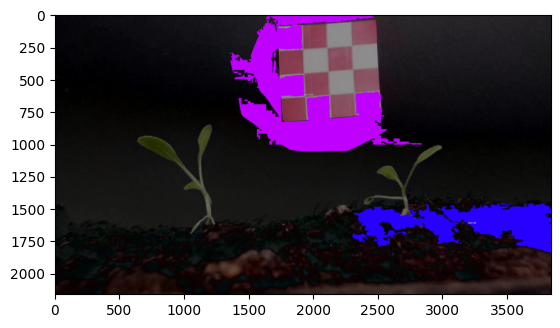

In [12]:
plotting_img = pcv.visualize.obj_sizes(img=img, mask=a_fill, num_objects=2)

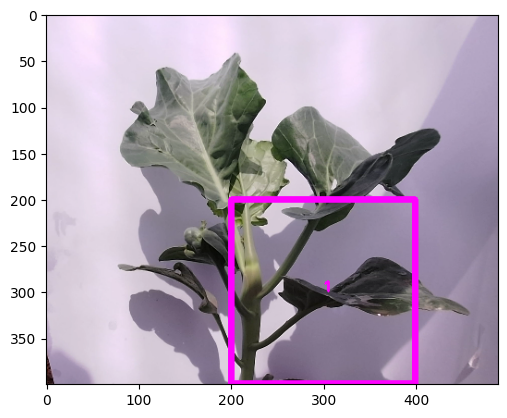

In [13]:
roi = pcv.roi.rectangle(img=img, x=200, y=200, h=200, w=200)

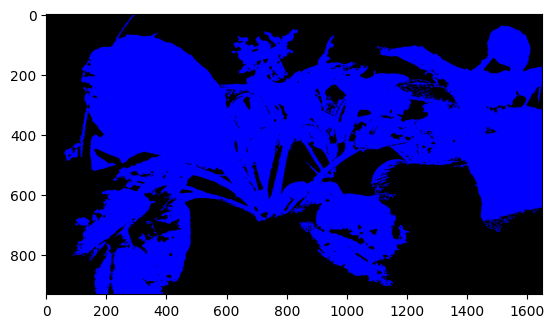

In [22]:
labeled_mask, num_plants = pcv.create_labels(mask=a_fill, rois=roi, roi_type='partial')